In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("dataset/bank+marketing/bank/bank-full.csv", sep=';')

In [3]:
print(df.shape)

(45211, 17)


In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Accuracy: 0.8740462235983634

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.48      0.48      0.48      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043


Confusion Matrix:
 [[7378  574]
 [ 565  526]]


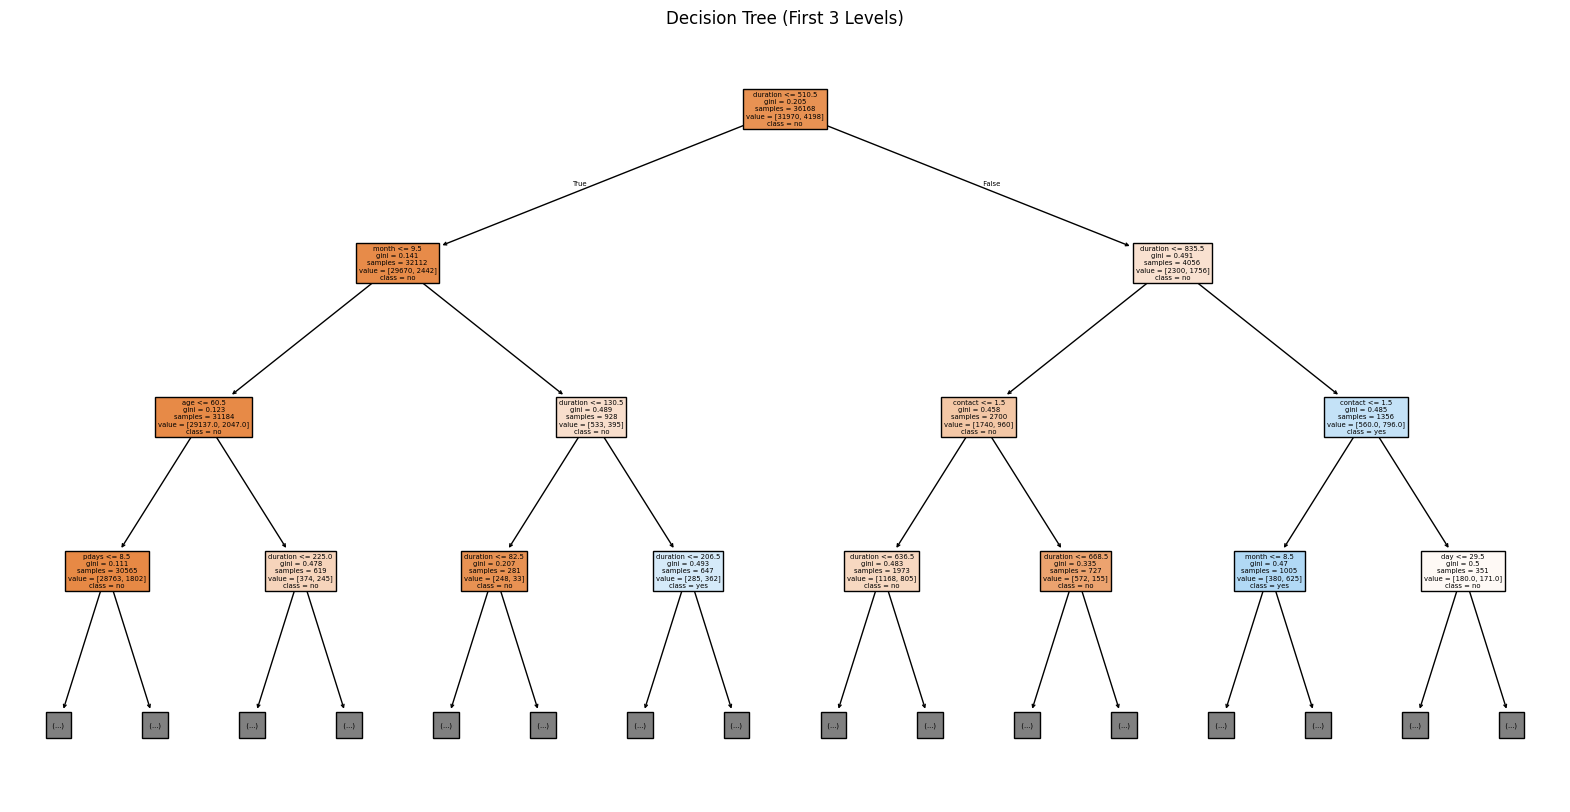

In [5]:

data = df.copy()
label_encoders = {}

X = data.drop("y", axis=1)
y = data["y"]

for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=target_encoder.classes_, filled=True, max_depth=3)
plt.title("Decision Tree (First 3 Levels)")
plt.show()

Class Distribution:
 0    88.30152
1    11.69848
Name: proportion, dtype: float64


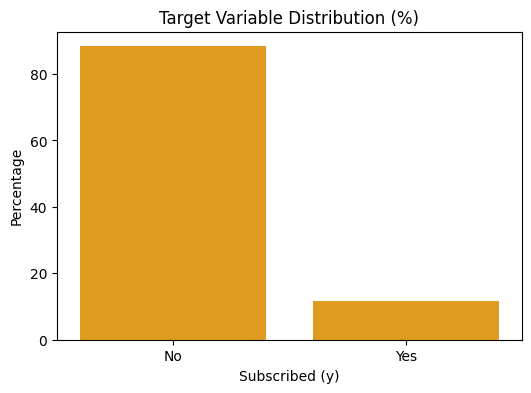


Top 10 Important Features:
 duration    0.294289
balance     0.110755
age         0.104776
month       0.103624
day         0.083587
pdays       0.054215
poutcome    0.049498
job         0.048486
campaign    0.034509
housing     0.024067
dtype: float64


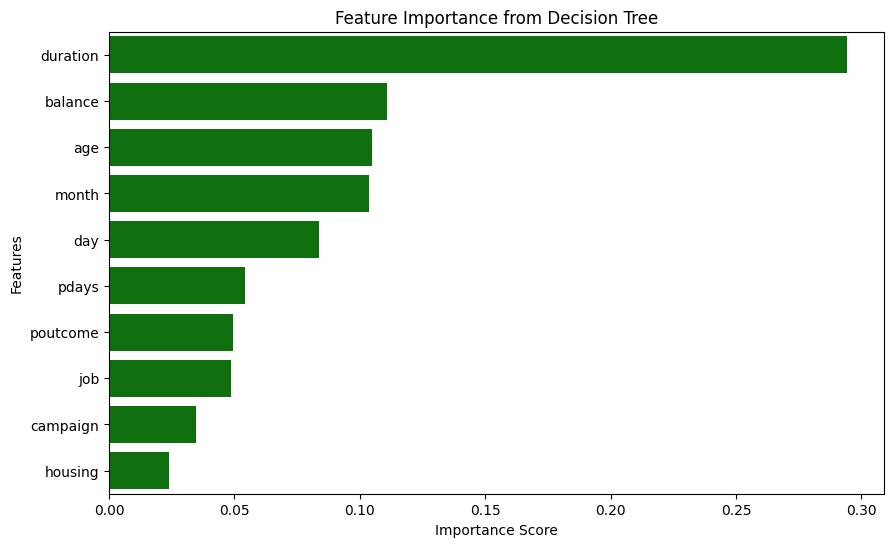

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

class_distribution = pd.Series(y).value_counts(normalize=True) * 100
print("Class Distribution:\n", class_distribution)

plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution.index.map({0: "No", 1: "Yes"}), y=class_distribution.values, color = "orange")
plt.title("Target Variable Distribution (%)")
plt.ylabel("Percentage")
plt.xlabel("Subscribed (y)")
plt.show()

feature_importance = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 10 Important Features:\n", feature_importance.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.head(10).values, y=feature_importance.head(10).index, color = "green")
plt.title("Feature Importance from Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

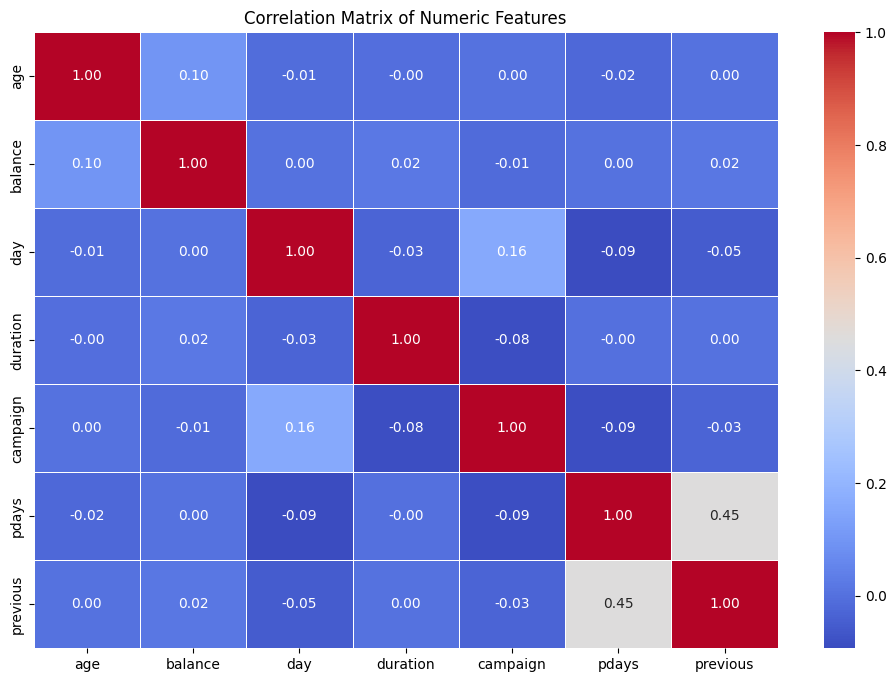

In [7]:
numeric_data = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


In [8]:
clf_pruned = DecisionTreeClassifier(random_state=42, max_depth=5)
clf_pruned.fit(X_train, y_train)
y_pred_pruned = clf_pruned.predict(X_test)

print("Accuracy (pruned):", accuracy_score(y_test, y_pred_pruned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_pruned))

Accuracy (pruned): 0.8935087913303107

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      7952
           1       0.59      0.40      0.48      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.68      0.71      9043
weighted avg       0.88      0.89      0.88      9043



In [9]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

clf_smote = DecisionTreeClassifier(random_state=42)
clf_smote.fit(X_res, y_res)
y_pred_sm = clf_smote.predict(X_test)

print("Accuracy (SMOTE):", accuracy_score(y_test, y_pred_sm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_sm))


Accuracy (SMOTE): 0.8468428618821188

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91      7952
           1       0.40      0.57      0.47      1091

    accuracy                           0.85      9043
   macro avg       0.67      0.73      0.69      9043
weighted avg       0.87      0.85      0.86      9043



### task 3 complete!!